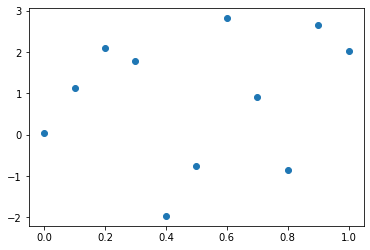

Error from the observed and the ideal signal
1.8837405871498951
Approx model


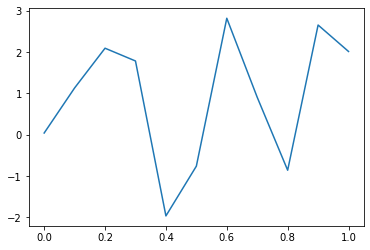

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy.linalg import pinv

"""
Main function
"""
def runCurveFittingExample():
   
    #Upper bound
    Max = 1;
    #??
    N = 10;
    stdNoise = 2;
    M = 30;
    lambdaF = 0;
    #independent variable array
    x = np.arange(0, Max, 1/(N/Max));                 
    x = np.concatenate((x, np.array([Max])));                 
    #observed values and real values    
    (t, yReal) = getObservationArray(x, stdNoise);
    #scatter of the noisy signal
    plt.scatter(x, t);
    plt.show()
    #error from observed and ideal signal
    (e, eRMS) = getError(yReal, t);
    print("Error from the observed and the ideal signal")
    print(eRMS);
         
    #calculate the weights for the polynomial model     
    w = getOptimumWReg(x, t, M, lambdaF);
    yApprox = np.zeros(np.shape(x));
    #evaluate the model
    for i in range(0, np.size(x)):
        yApprox[i] = getY(x[i] , w);
      
    #plot the model response for the given x values
    print("Approx model")
    plt.plot(x, yApprox);
    plt.show();
    #rint(w)
                      
"""
According to the weights w, evaluates the polynomial model
@param xScalar, x value to evaluate... i.e. y(xScalar)
@param w, array of weights for the polynomial model
@return y
""" 
def getY(xScalar, w):
    y = 0;
    for i in range(0, np.size(w)):
        y = y + w[i] * xScalar ** i;
    return y;

"""
Creates the observation array t, from a sinusoidal wave
@param x, the x values 
@param stdNoise, standard deviation of noise, hihger, lower signal to noise ratio
@return (t, yReal), the observed values and the original signal without noise
"""                 
def getObservationArray(x, stdNoise):
    snr = 8;
    yReal = np.sin(2* np.pi * x);
    #create noise
    noise = np.random.normal(0, stdNoise, yReal.shape);
    #additive gaussian noise                        
    t = yReal + noise;
    return (t, yReal);
"""
Returns the error from arrays y and t
@param y, array with the real values (without noise)
@param t, array with observed values, with noise
@return (e, eRMS)
"""
def getError(y, t):
    e = 0.5 * np.sum(np.square(y - t));
    eRMS = np.sqrt((2*e)/y.size);
    return (e, eRMS)

"""
Calculate the w weights 
@param x, array of x values
@param t, array of target or observed values
@param M, number of polynomial bases used
@param lambdaF, regularization parameter
"""
def getOptimumWReg(x, t, M, lambdaF):
    M += 1;
    #init matrix with replicated x per column
    X = np.zeros((x.size, M));
    for i in range(0, X.shape[0]):
        for j in range(0, X.shape[1]):
            #definition of matrix X
            X[i, j] = x[i] ** j;
    # X * X^t        
    term1 = np.matmul(X.transpose(), X);
    # lambda * I;                  
    lambdaI = lambdaF  * np.identity(np.shape(term1)[0]);
    #(X * X^t + lambda *I)
    fac1 = term1 + lambdaI
    #X^t * t
    fac2 = np.matmul(X.transpose(), t);
    fac1Inv =  pinv(fac1);               
                    
    w = np.matmul(fac1Inv, fac2);
    return w;                               
    
                  
runCurveFittingExample();                 
                  
    

    